## Draft: check values for Tools and Services in the MarketPlace Dataset 

This notebook checks values in the MarketPlace datsaset for Tools and Services. 



#### External libraries and function to download descriptions from the MarketPlace dataset using the API
The following two cells are used to import the external libraries used in this Notebook and to define a function; in the final release of this Notebook this function will be (possibly) optimized and provided as an external library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def getMPDescriptions (url, pages):
    mdx = pd.Series(range(1, pages+1))
    df_desc = pd.DataFrame()
    for var in mdx:
        turl = url+str(var)+"&perpage=20"
        df_desc_par=pd.read_json(turl, orient='columns')
        df_desc=df_desc.append(df_desc_par, ignore_index=True)
        
    return (df_desc)

### Get the the descriptions of Tools and Services
The MarketPlace API are used to download the descriptions of Tools and Services

In [3]:
df_tool_all = pd.DataFrame()
df_tool_all =getMPDescriptions ("https://sshoc-marketplace-api.acdh-dev.oeaw.ac.at/api/tools-services?page=", 81)
df_tool_all.index

RangeIndex(start=0, stop=1606, step=1)

#### A quick look at data

In [315]:
df_tool_flat = pd.json_normalize(df_tool_all['tools'])
#df_tool_work=df_tool_flat[['id', 'category', 'label', 'licenses', 'contributors', 'accessibleAt', 'sourceItemId']]
df_tool_flat.count()

id                                         1606
category                                   1606
label                                      1606
version                                       0
persistentId                               1606
description                                1606
licenses                                   1606
contributors                               1606
properties                                 1606
externalIds                                1606
accessibleAt                               1606
sourceItemId                               1606
relatedItems                               1606
lastInfoUpdate                             1606
status                                     1606
olderVersions                              1606
newerVersions                              1606
source.id                                  1606
source.label                               1606
source.url                                 1606
source.urlTemplate                      

In [80]:
df_tool_flat_opt=pd.json_normalize(df_tool_all['tools'])
df_tool_flat_opt = df_tool_flat_opt.replace('No description provided.', np.nan)
df_tool_flat_opt.licenses = df_tool_flat_opt.licenses.apply(lambda y: np.nan if len(y)==0 else y)
df_tool_flat_opt.externalIds = df_tool_flat_opt.externalIds.apply(lambda y: np.nan if len(y)==0 else y)
df_tool_flat_opt.contributors = df_tool_flat_opt.contributors.apply(lambda y: np.nan if len(y)==0 else y)
df_tool_flat_opt.accessibleAt = df_tool_flat_opt.accessibleAt.apply(lambda y: np.nan if len(y)==0 else y)
df_tool_flat_opt.relatedItems = df_tool_flat_opt.relatedItems.apply(lambda y: np.nan if len(y)==0 else y)
df_tool_flat_opt.olderVersions = df_tool_flat_opt.olderVersions.apply(lambda y: np.nan if len(y)==0 else y)
df_tool_flat_opt.newerVersions = df_tool_flat_opt.newerVersions.apply(lambda y: np.nan if len(y)==0 else y)
df_tool_flat_opt.properties = df_tool_flat_opt.properties.apply(lambda y: np.nan if len(y)==0 else y)

In [194]:
print('{:<35}Number of missing values'.format("Property"), end='\n')
df_tool_flat_opt.isnull().sum()

Property                           Number of missing values


id                                            0
category                                      0
label                                         0
version                                    1606
persistentId                                  0
description                                 174
licenses                                   1605
contributors                                366
properties                                  199
externalIds                                1606
accessibleAt                                507
sourceItemId                                  0
relatedItems                               1478
lastInfoUpdate                                0
status                                        0
olderVersions                                 2
newerVersions                              1606
source.id                                     0
source.label                                  0
source.url                                    0
source.urlTemplate                      

### Checking description values

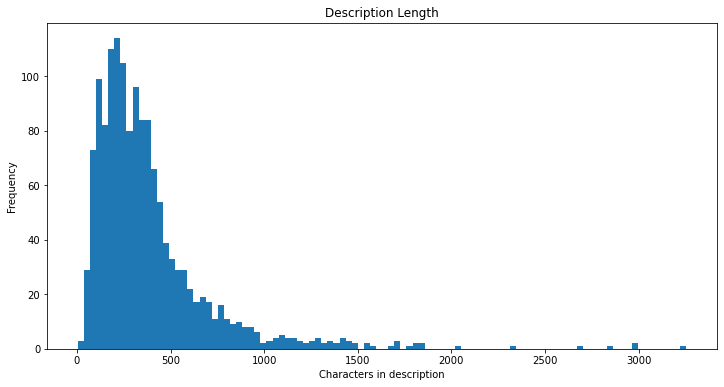

In [115]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(df_tool_flat_opt['description'].str.len(),  bins=100)
ax.set_title('Description Length')
ax.set_xlabel('Characters in description')
ax.set_ylabel('Frequency');

In [195]:
print (f"\n There are {df_tool_flat_opt['description'].isna().sum()} Tools and Services with empty descriptions\n")


 There are 174 Tools and Services with empty descriptions



In [185]:
#Print the Tools and Services with empty descriptions in a CSV file 
df_tool_flat_opt_e=df_tool_flat_opt[df_tool_flat_opt['description'].isna()]
df_tool_flat_opt_e[['id', 'label', 'description']].sort_values('label').to_csv(path_or_buf='ts_emptydescription.csv')

Count all Tools and Services  where the description is shorter than  an old school tweet (clearly the minimum amount of characters required to express any meaningful information in these years...:).

In [190]:
df_tool_flat_d = df_tool_flat_opt[(df_tool_flat_opt['description'].notnull()) & (df_tool_flat_opt['description'].str.len()<140)]
print (f'\n There are {df_tool_flat_d["description"].count()} Tools and Services where the description has less than 140 characters\n')


 There are 217 Tools and Services where the description has less than 140 characters



The following table shows some Tools and Services with short description. The list is currently saved on a file, this could be changed if we decided that this is a significant curation feature.

In [191]:
df_tool_flat_d[['id', 'label', 'description']].sort_values('label').head().style.set_properties(subset=['description'], **{'width': '600px'})

,id,label,description
76,29934,ARRAS,ARRAS is a historically important tool for analyzing and concording text. It notably provided inspiration for the TACT system.
15,30370,Acronym Finder - Beta (TAPoRware),This tool locates acronyms and matches them with the corresponding full name from a user-specified input text.
27,30353,Aelfred,"Aelfred is a bare-bones Java XML parser. It has not been updated since 2002, and is dependent on JDK 1.4, which is very outdated."
49,29219,AnnotateIt,AnnotateIt lets users annotate anything anywhere on the web.
56,29224,Annotum,"Annotum is an open-source, open-process, open-access scholarly authoring and publishing platform based on WordPress."


In [155]:
df_tool_flat_d[['id', 'label', 'description']].sort_values('label').to_csv(path_or_buf='ts_shortdescription.csv')

### Chek RelatedItems

In [307]:
df_tool_flat_ri = df_tool_flat_opt[(df_tool_flat_opt['relatedItems'].notnull())]
df_tool_flat_ri[['label','relatedItems' ]].head()

,label,relatedItems
1,3DF Zephyr - photogrammetry software - 3d mode...,"[{'id': 28553, 'persistentId': 'pXppX6', 'cate..."
5,"3ds Max \| 3D Modeling, Animation \& Rendering...","[{'id': 28451, 'persistentId': 'yBynJn', 'cate..."
25,Adobe Photoshop,"[{'id': 28370, 'persistentId': 'H3itga', 'cate..."
31,Agisoft Metashape,"[{'id': 28553, 'persistentId': 'pXppX6', 'cate..."
33,A JavaScript library for rendering music notat...,"[{'id': 28256, 'persistentId': 'pTeD0I', 'cate..."


In [314]:
df_prop_data_ri = pd.json_normalize(data=df_tool_all['tools'], record_path='relatedItems', meta_prefix='tool_', meta=['label'])
df_prop_data_ri.sort_values(['tool_label', 'label']).head(7)

,id,persistentId,category,label,description,relation.code,relation.label,tool_label
0,28553,pXppX6,step,Acquisition of a 3D object (by photogrammetry),The photogrammetry method relies on a\n ...,is-mentioned-in,Is mentioned in,3DF Zephyr - photogrammetry software - 3d mode...
1,28451,yBynJn,step,Migration to target format,Due to the diversity of digitizing\n ...,is-mentioned-in,Is mentioned in,"3ds Max \| 3D Modeling, Animation \& Rendering..."
4,28256,pTeD0I,step,Present in an open source digital CMS the resu...,If the published musical corpus is a critical\...,is-mentioned-in,Is mentioned in,A JavaScript library for rendering music notat...
10,28745,EkaEsI,step,Describe and annotate,Enrich the 3D object with annotation\n ...,is-mentioned-in,Is mentioned in,"ARCO: An Architecture for Digitization, Manage..."
2,28370,H3itga,step,Image Post-Processing,Applying post proccesing methods in order to e...,is-mentioned-in,Is mentioned in,Adobe Photoshop
3,28553,pXppX6,step,Acquisition of a 3D object (by photogrammetry),The photogrammetry method relies on a\n ...,is-mentioned-in,Is mentioned in,Agisoft Metashape
6,30640,nwFcfk,training-material,Corpus Analysis with Antconc,This lesson introduces how to use Antconc soft...,relates-to,Relates to,AntConc


In [318]:
df_tool_edges=df_tool_flat[['id','label','persistentId']]
df_list_of_ri=pd.merge(left=df_prop_data_ri, right=df_tool_edges, left_on='persistentId', right_on='persistentId')
df_list_of_ri.head()

,id_x,persistentId,category,label_x,description,relation.code,relation.label,tool_label,id_y,label_y


### Checking values on Contributors

In [198]:
print (f"\n There are {df_tool_flat_opt['contributors'].isna().sum()} Tools and Services with no contributors\n")


 There are 366 Tools and Services with no contributors



In [203]:
df_prop_data_co = pd.json_normalize(data=df_tool_all['tools'], record_path='contributors', meta_prefix='tool_', meta=['label'])
df_prop_data_co.sort_values('tool_label').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1372 entries, 0 to 1355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   actor.id            1372 non-null   int64 
 1   actor.name          1372 non-null   object
 2   actor.externalIds   1372 non-null   object
 3   actor.website       566 non-null    object
 4   actor.email         293 non-null    object
 5   actor.affiliations  1372 non-null   object
 6   role.code           1372 non-null   object
 7   role.label          1372 non-null   object
 8   tool_label          1372 non-null   object
dtypes: int64(1), object(8)
memory usage: 107.2+ KB


In [204]:
df_prop_data_co.sort_values('tool_label').head()

,actor.id,actor.name,actor.externalIds,actor.website,actor.email,actor.affiliations,role.code,role.label,tool_label
0,483,"Ian Pearce, Devin Gaffney",[],None,None,[],contributor,Contributor,140kit
1,213,Dassault Systemes,[],None,None,[],contributor,Contributor,3DVIA Virtools
2,451,4D,[],http://www.4d.com/,None,[],contributor,Contributor,4th Dimension
3,617,80legs,[],None,None,[],contributor,Contributor,80legs
4,256,Nathan Smith,[],http://sonspring.com/,None,[],contributor,Contributor,960 Grid System


In [207]:
df_prop_data_contrib = pd.json_normalize(data=df_tool_all['tools'], record_path='contributors', meta_prefix='tool_', meta=['label'])
df_prop_data_contrib['actor.externalIds'] = df_prop_data_contrib['actor.externalIds'].apply(lambda y: np.nan if len(y)==0 else y)
df_prop_data_contrib['actor.affiliations'] = df_prop_data_contrib['actor.affiliations'].apply(lambda y: np.nan if len(y)==0 else y)
print('{:<15}Number of missing values'.format("Property"), end='\n')
df_prop_data_contrib.isnull().sum()

Property       Number of missing values


actor.id                 0
actor.name               0
actor.externalIds     1372
actor.website          806
actor.email           1079
actor.affiliations    1372
role.code                0
role.label               0
tool_label               0
dtype: int64

#### Check the validity of URLs in the *actor.website* property using the HTTP Result Status
The code below explicitly execute an http call for every URL, waits for the [Result Status Code](https://en.wikipedia.org/wiki/List_of_HTTP_status_codes)  of the call and then registers the code.  
Depending on connections and server answer times it may take several minutes to process all URLs.  
In the final release of this Notebook this code will be (possibly) optimized and provided as an external library.

In [213]:
df_tool_work_urls=df_prop_data_contrib[df_prop_data_contrib['actor.website'].str.len()>0]
df_urls=df_tool_work_urls['actor.website'].values
df_tool_work_aa_http_status = pd.DataFrame (columns = ['url','status'])
import requests
import re
regex = re.compile(
        r'^(?:http|ftp)s?://' # http:// or https://
        r'(?:(?:[A-Z0-9](?:[A-Z0-9-]{0,61}[A-Z0-9])?\.)+(?:[A-Z]{2,6}\.?|[A-Z0-9-]{2,}\.?)|' #domain...
        r'localhost|' #localhost...
        r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})' # ...or ip
        r'(?::\d+)?' # optional port
        r'(?:/?|[/?]\S+)$', re.IGNORECASE)
for var in df_urls:
    if ( var != "" and var!=None and re.match(regex, var)):
        try:
            r =requests.get(var,timeout=8)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(r.status_code)}, ignore_index=True)
        except requests.exceptions.ConnectionError:
          #  print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(503)}, ignore_index=True)
        except requests.exceptions.ConnectTimeout:
          #  print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(408)}, ignore_index=True)
        except requests.exceptions.ReadTimeout:
         #   print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(408)}, ignore_index=True)
        except requests.exceptions.RequestException:
         #   print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(500)}, ignore_index=True)
        except TypeError:
        #    print(var)
            df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(400)}, ignore_index=True)
    else:
       # print(var ,0)
        df_tool_work_aa_http_status = df_tool_work_aa_http_status.append({'url': var, 'status': int(400)}, ignore_index=True)
df_tool_work_aa_http_status.head()

,url,status
0,http://www.4d.com/,200
1,http://sonspring.com/,200
2,https://www.abbyy.com/,200
3,http://geoffreyrockwell.com/,200
4,https://www.adobe.com/,200


In [214]:
df_http_status_sub=df_tool_work_aa_http_status[df_tool_work_aa_http_status['status'] != 1]
df_db_st = df_http_status_sub['status'].value_counts()
print('{:<8}Frequency'.format("Status"))
df_db_st.head(10)

Status  Frequency


200    462
503     54
404     28
403      8
406      5
500      3
408      3
502      2
400      1
Name: status, dtype: int64

The first column in the table above shows the HTTP Status codes obtained when trying to connect on *accessibleAt* URLs, the second column the total number of URLs returning the status.
Notice that while 404 means that the resource is not found, other status codes may indicate temporary problems.  
The image below summarizes of the above result.

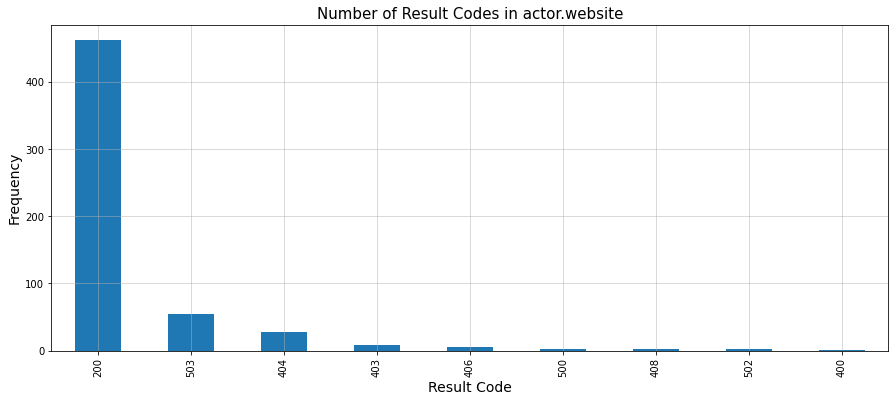

In [302]:
fig, ax = plt.subplots()
df_db_st.plot(kind='bar', figsize=(15,6), x='Code', y='Frequency',)
plt.grid(alpha=0.6)
ax.yaxis.set_label_text("")
ax.set_title("Number of Result Codes in actor.website", fontsize=15)
ax.set_xlabel('Result Code', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14);
plt.show()

The list of possibly wrong URLs is saved in a Comma Separated Values (CSV) file having the following columns: *id, label, url, status*. The final release of this notebook will save this data in the curation dataset.

In [222]:
df_http_status_err=df_http_status_sub[df_http_status_sub['status'] != 200]
df_list_of_tools_wrongaa=pd.merge(left=df_prop_data_contrib, right=df_http_status_err, left_on='actor.website', right_on='url')
df_list_of_tools_wrongaa.head()
df_list_of_tools_wrongaa[['actor.id', 'tool_label', 'actor.website', 'status']].sort_values('tool_label').to_csv(path_or_buf='ts_wrongcontributorsurls.csv')

### Checking values on Properties

In [225]:
print (f"\n There are {df_tool_flat_opt['properties'].isna().sum()} Tools and Services with no properties\n")


 There are 199 Tools and Services with no properties



In [226]:
#TODO: Print/Save the Tools and Services with empty properties 

In [239]:
df_prop_data_ts = pd.json_normalize(data=df_tool_all['tools'], record_path='properties', meta_prefix='ts_', meta=['label'])
#df_prop_data_ts.sort_values('ts_label').head(7)

In [255]:
df_prop_data_ts = pd.json_normalize(data=df_tool_all['tools'], record_path='properties', meta_prefix='ts_', meta=['label'])
df_prop_data_ts['type.allowedVocabularies'] = df_prop_data_ts['type.allowedVocabularies'].apply(lambda y: np.nan if len(y)==0 else y)
print('{:<25}Number of missing values'.format("Property"), end='\n')
df_prop_data_ts.isnull().sum()

Property                 Number of missing values


id                                    0
value                              3263
type.code                             0
type.label                            0
type.type                             0
type.ord                              0
type.allowedVocabularies           3128
concept.code                       3128
concept.vocabulary.code            3128
concept.vocabulary.label           3128
concept.vocabulary.accessibleAt    6391
concept.label                      3128
concept.notation                   3128
concept.definition                 3128
concept.uri                        3128
concept                            6391
ts_label                              0
dtype: int64

#### Values in *type.code*

In [266]:
a_df=df_prop_data_ts.drop_duplicates(['type.code','ts_label'])
df_temp_tc_label = a_df['type.code'].value_counts()
print('{:<28}Frequency'.format("Type Code"), end='\n')
df_temp_tc_label.head(39)

Type Code                   Frequency


media                          1092
activity                       1080
terms-of-use                    916
tool-family                     156
keyword                         142
language                        132
thumbnail                        68
version                          56
authentication                   51
geographical-availabilities      15
life-cycle-status                15
technical-readiness-level        15
usermanual-url                   11
source-last-update               11
service-level-url                 9
see-also                          9
helpdesk-url                      6
termsofuse-url                    5
privacypolicy-url                 4
methodica-link                    4
accesspolicy-url                  3
pages                             2
volume                            1
repository-url                    1
wikidata-id                       1
doi                               1
license                           1
media-caption               

In [291]:
df_prop_data_ts[(df_prop_data_ts['type.code']=='terms-of-use')].sort_values('ts_label').tail(7)

,id,value,type.code,type.label,type.type,type.ord,type.allowedVocabularies,concept.code,concept.vocabulary.code,concept.vocabulary.label,concept.vocabulary.accessibleAt,concept.label,concept.notation,concept.definition,concept.uri,concept,ts_label
6149,181262,Open Source,terms-of-use,Terms Of Use,string,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,word2vec
6148,181261,Free,terms-of-use,Terms Of Use,string,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,word2vec
6226,181814,Free,terms-of-use,Terms Of Use,string,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wordsimilarity (Word 2 Word)
6227,181815,Open Source,terms-of-use,Terms Of Use,string,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wordsimilarity (Word 2 Word)
6271,179508,Open Source,terms-of-use,Terms Of Use,string,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xMod
6268,179505,Free,terms-of-use,Terms Of Use,string,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,xMod
6303,178536,Closed Source,terms-of-use,Terms Of Use,string,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yED Files


In [267]:
df_typecode_ts=df_prop_data_ts[['ts_label', 'type.code']]
df_typecode_ts_flat=df_typecode_ts.groupby('ts_label')['type.code'].apply(set).reset_index(name='typecodes')
df_typecode_ts_flat.head()

,ts_label,typecodes
0,140kit,"{activity, media}"
1,3DF Zephyr - photogrammetry software - 3d mode...,"{language, keyword}"
2,3DHOP,"{language, keyword}"
3,3DHOP: 3D Heritage Online Presenter,{keyword}
4,3DReshaper \| 3DReshaper,{language}


In [277]:
from collections import Counter, defaultdict
import itertools
cooccurrences = []

for props in df_typecode_ts_flat['typecodes']:
    prop_pairs = itertools.combinations(props, 2)
    for pair in prop_pairs:
        cooccurrences.append(tuple(sorted(pair)))

# Count the frequency of each cooccurring pair.
properties_co_counter = Counter(cooccurrences)

In [281]:
print("Top TypeCodes Cooccurrences by Frequency", '\n')
print('{:<50}{}'.format('Cooccurrence', 'Frequency'))
for k, v in properties_co_counter.most_common(10):
    topics = '['+k[0] + ', ' + k[1]+']'
    print(f'{topics:<50}{v}')

Top TypeCodes Cooccurrences by Frequency 

Cooccurrence                                      Frequency
[activity, media]                                 1013
[media, terms-of-use]                             861
[activity, terms-of-use]                          828
[media, tool-family]                              156
[terms-of-use, tool-family]                       151
[activity, tool-family]                           143
[keyword, language]                               90
[thumbnail, version]                              56
[authentication, thumbnail]                       51
[authentication, version]                         51


In [282]:
property_cooccurrences = list(
    itertools.chain(*[[tuple(sorted(c)) for c in itertools.combinations(d, 2)] 
                      for d in df_typecode_ts_flat['typecodes']])
)
# Count the frequency of each cooccurring pair.
property_edge_counter = Counter(property_cooccurrences)

In [283]:
property_cooccurrence_df = pd.DataFrame({
    'prop0': [dcc[0] for dcc in property_edge_counter.keys()],
    'prop1': [dcc[1] for dcc in property_edge_counter.keys()],
    'count': list(property_edge_counter.values()),
}).pivot_table(index='prop0', columns='prop1')['count']

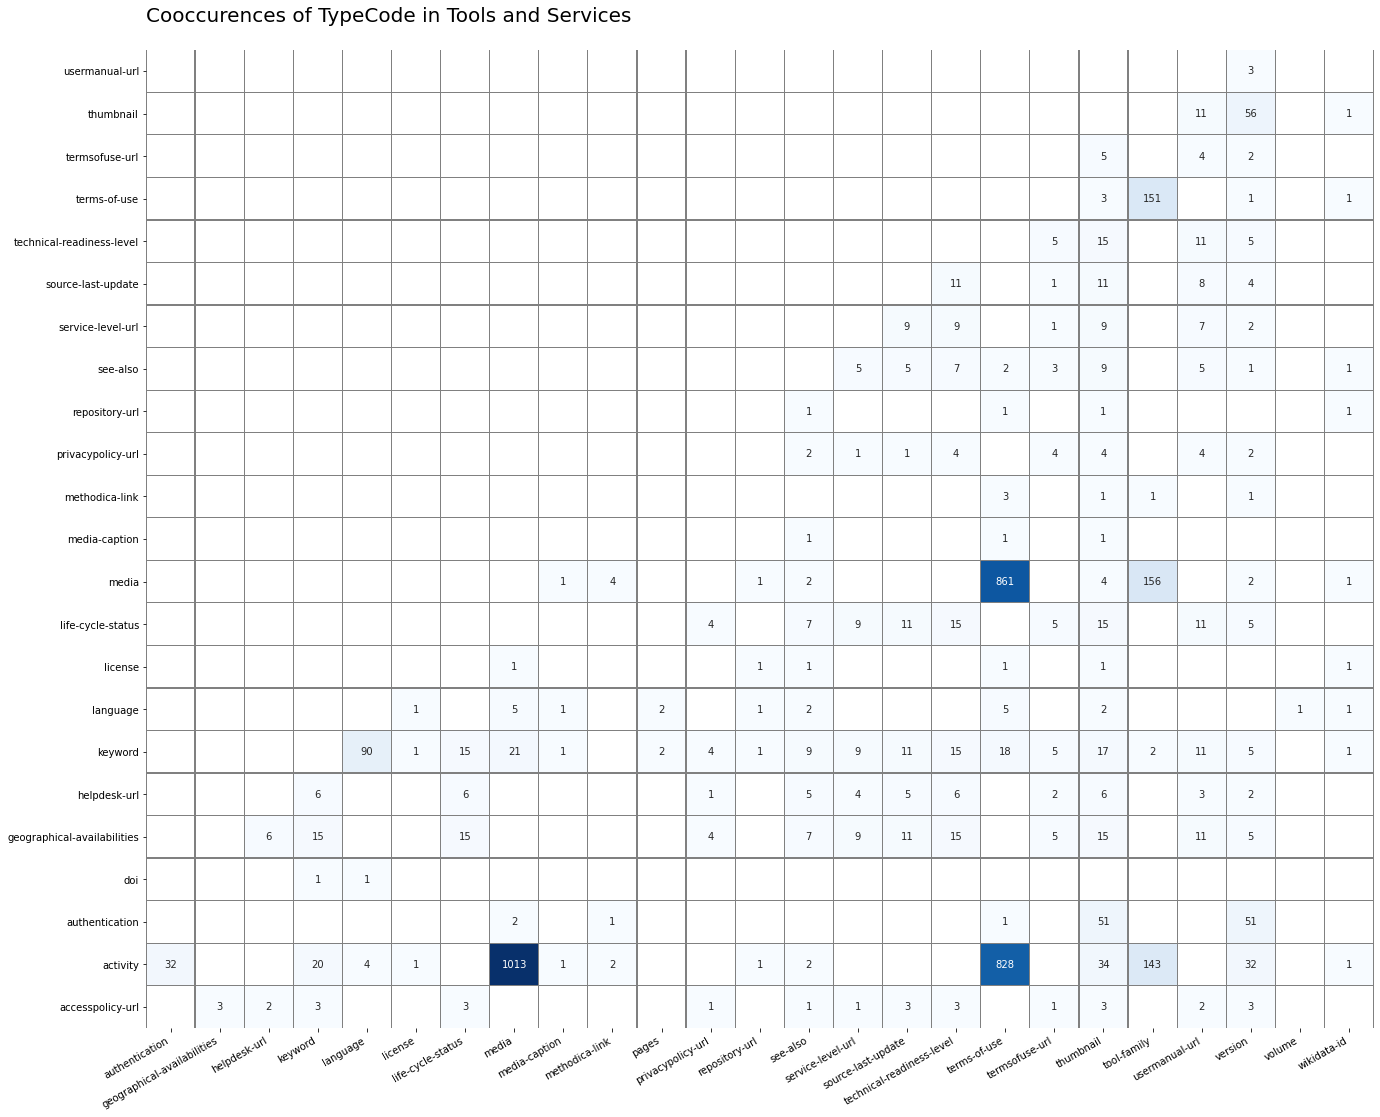

In [285]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(22, 18))
sns.heatmap(property_cooccurrence_df, annot=True, linewidths=0.2, fmt='.0f', ax=ax, cbar=None, cmap='Blues', linecolor='gray')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.invert_yaxis()
ax.set_xlabel(None)
ax.set_ylabel(None)
#sns.heatmap(df, linewidths=2, linecolor='yellow')
title = 'Cooccurences of TypeCode in Tools and Services\n'
plt.title(title, loc='left', fontsize=20)
plt.show()

### Values in *concept.vocabulary.code*

In [299]:
acvc_df=df_prop_data_ts.drop_duplicates(['concept.vocabulary.code','ts_label'])
df_temp_cvc_label = acvc_df['concept.vocabulary.code'].value_counts()
print('{:<18}Frequency'.format("Type Code"), end='\n')
df_temp_cvc_label.head(39)

Type Code         Frequency


tadirah2            1080
iso-639-3            130
iso-639-3-v2           2
software-license       1
Name: concept.vocabulary.code, dtype: int64

In [301]:
df_temp_cvc_concept = acvc_df['concept.label'].value_counts()
df_temp_cvc_concept.head(39)

Analyzing                   358
eng                         130
Discovering                 115
Disseminating               109
Capturing                   108
Creating                     58
Sharing                      32
Visual Analysis              29
Annotating                   28
Web Development              27
Organizing                   25
Editing                      19
Data Cleansing               18
Collaborating                16
Storing                      15
Gathering                    14
Publishing                   13
Parsing                      12
Content Analysis              8
Named Entity Recognition      8
Converting                    6
Communicating                 6
Tagging                       5
Programming                   5
Modeling                      5
Writing                       5
Imaging                       4
Translating                   4
Enriching                     3
Spatial Analysis              3
Recording                     3
Network 